# Linear Regression

## Solving methodology

### 1. Import libraries

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2. Load and adjust data

In [421]:
data = pd.read_csv('cars_dataset.csv', sep=',')

In [422]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


*Data details:*

In [423]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


*Drop model data.*

In [424]:
data = data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


*Missing values:*

In [425]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [426]:
data = data.dropna(axis=0)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [427]:
pd.options.display.max_rows = 20

### 3. Visualize data

**Car prices**

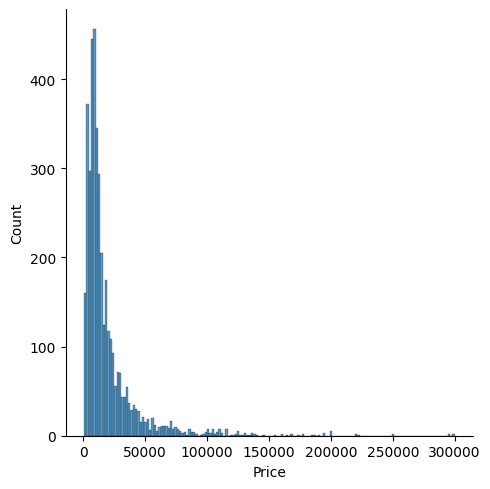

In [428]:
sns.displot(data['Price'])

**Car Milage**

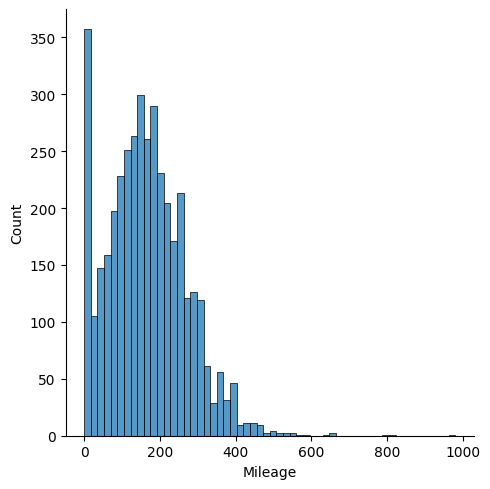

In [429]:
sns.displot(data['Mileage'])

**Engine Type**

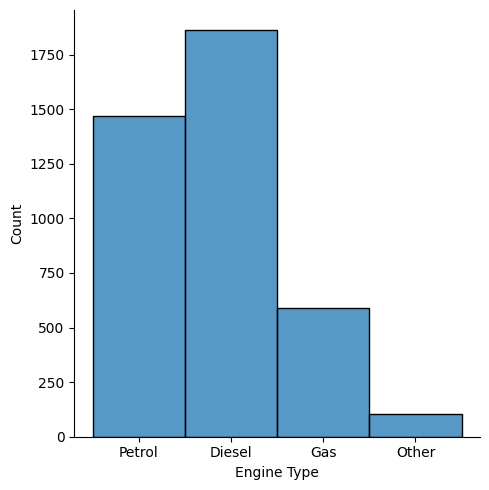

In [430]:
sns.displot(data['Engine Type'])

**Engine Volume**

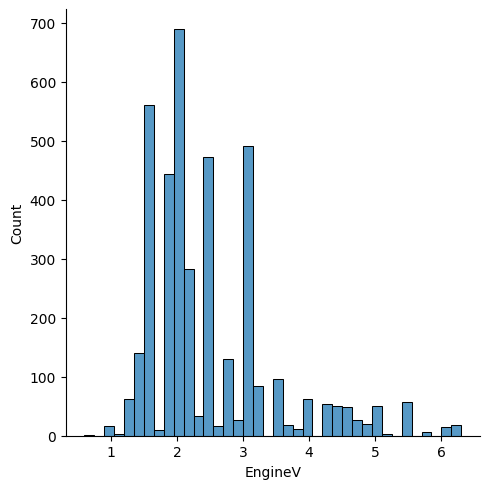

In [431]:
data = data[data['EngineV'] < 6.5]

sns.displot(data['EngineV'])

**Production Year**

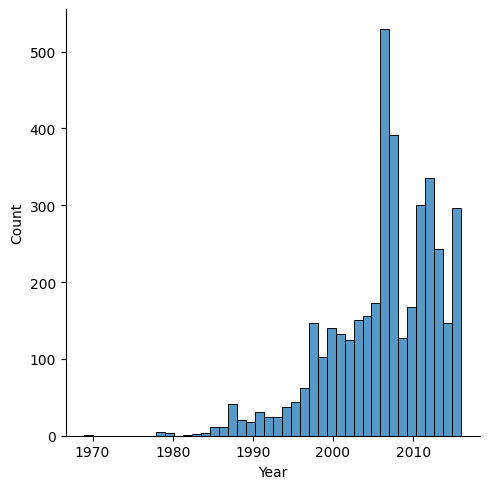

In [432]:
sns.displot(data['Year'])

In [433]:
data_cleaned = data.reset_index(drop=True)

## 4. Check OLS assumptions

**OLS assumptions**

Text(0, 0.5, 'Price')

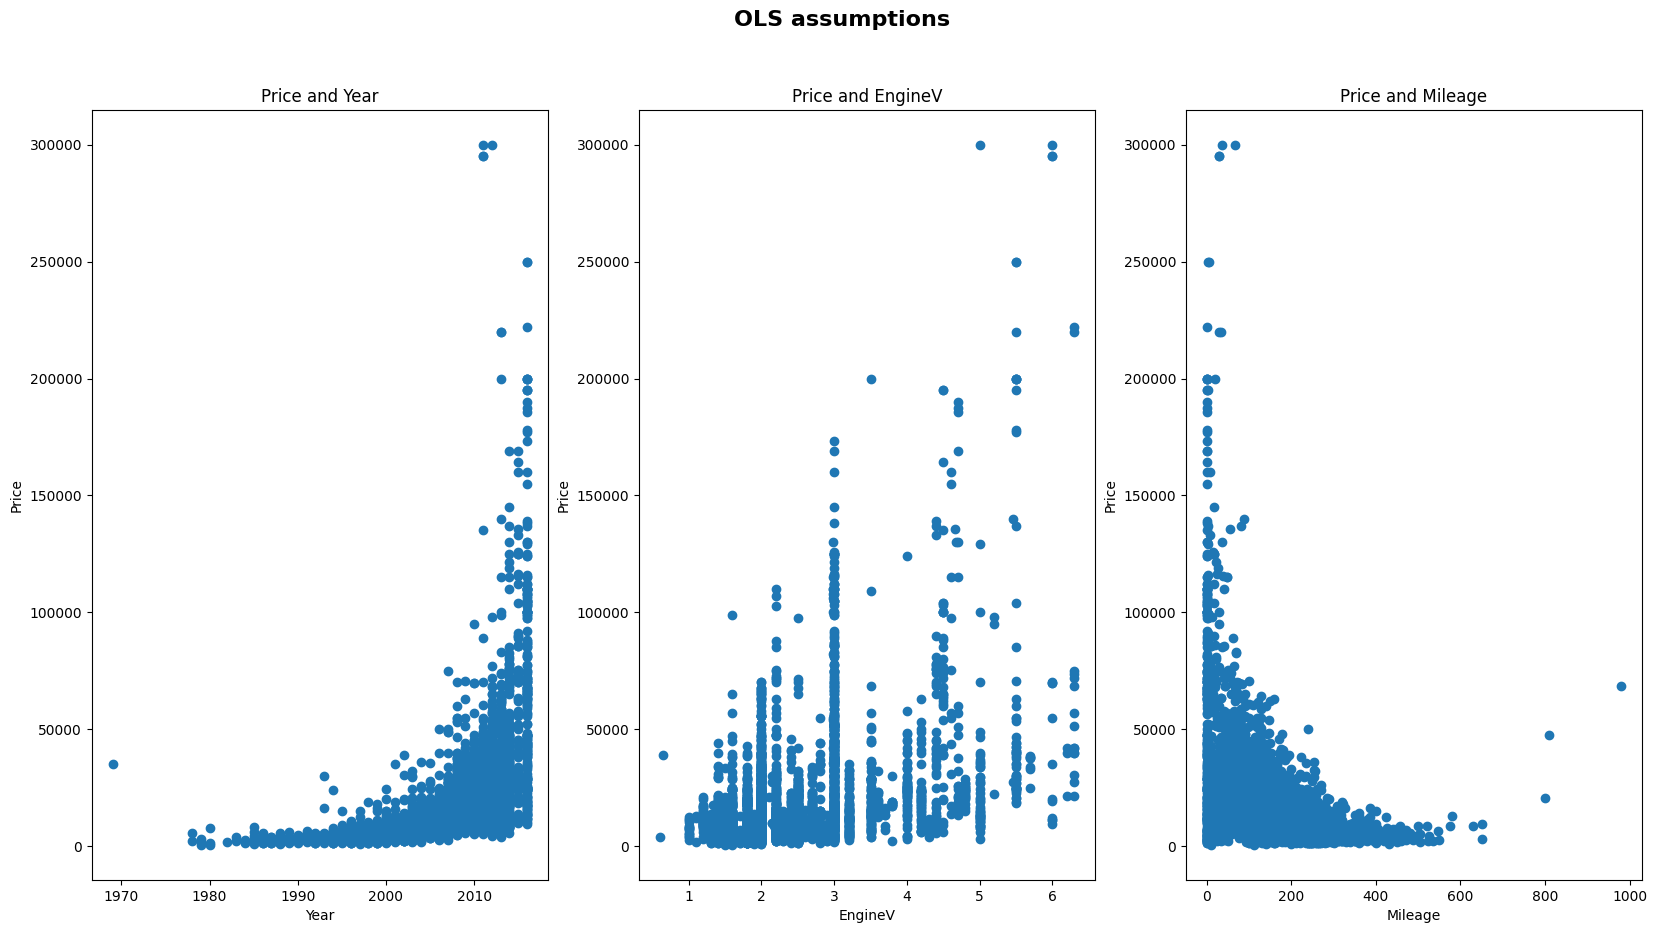

In [434]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('OLS assumptions', fontsize=16, fontweight='bold')

axes[0].scatter(data_cleaned['Year'], data_cleaned['Price'])
axes[0].set_title('Price and Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')

axes[1].scatter(data_cleaned['EngineV'], data_cleaned['Price'])
axes[1].set_title('Price and EngineV')
axes[1].set_xlabel('EngineV')
axes[1].set_ylabel('Price')

axes[2].scatter(data_cleaned['Mileage'], data_cleaned['Price'])
axes[2].set_title('Price and Mileage')
axes[2].set_xlabel('Mileage')
axes[2].set_ylabel('Price')

*Relax assumptions*

In [435]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3997,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3998,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3999,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78
4000,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,8.99


*After logarithmical price transformation:*

Text(0, 0.5, 'Log Price')

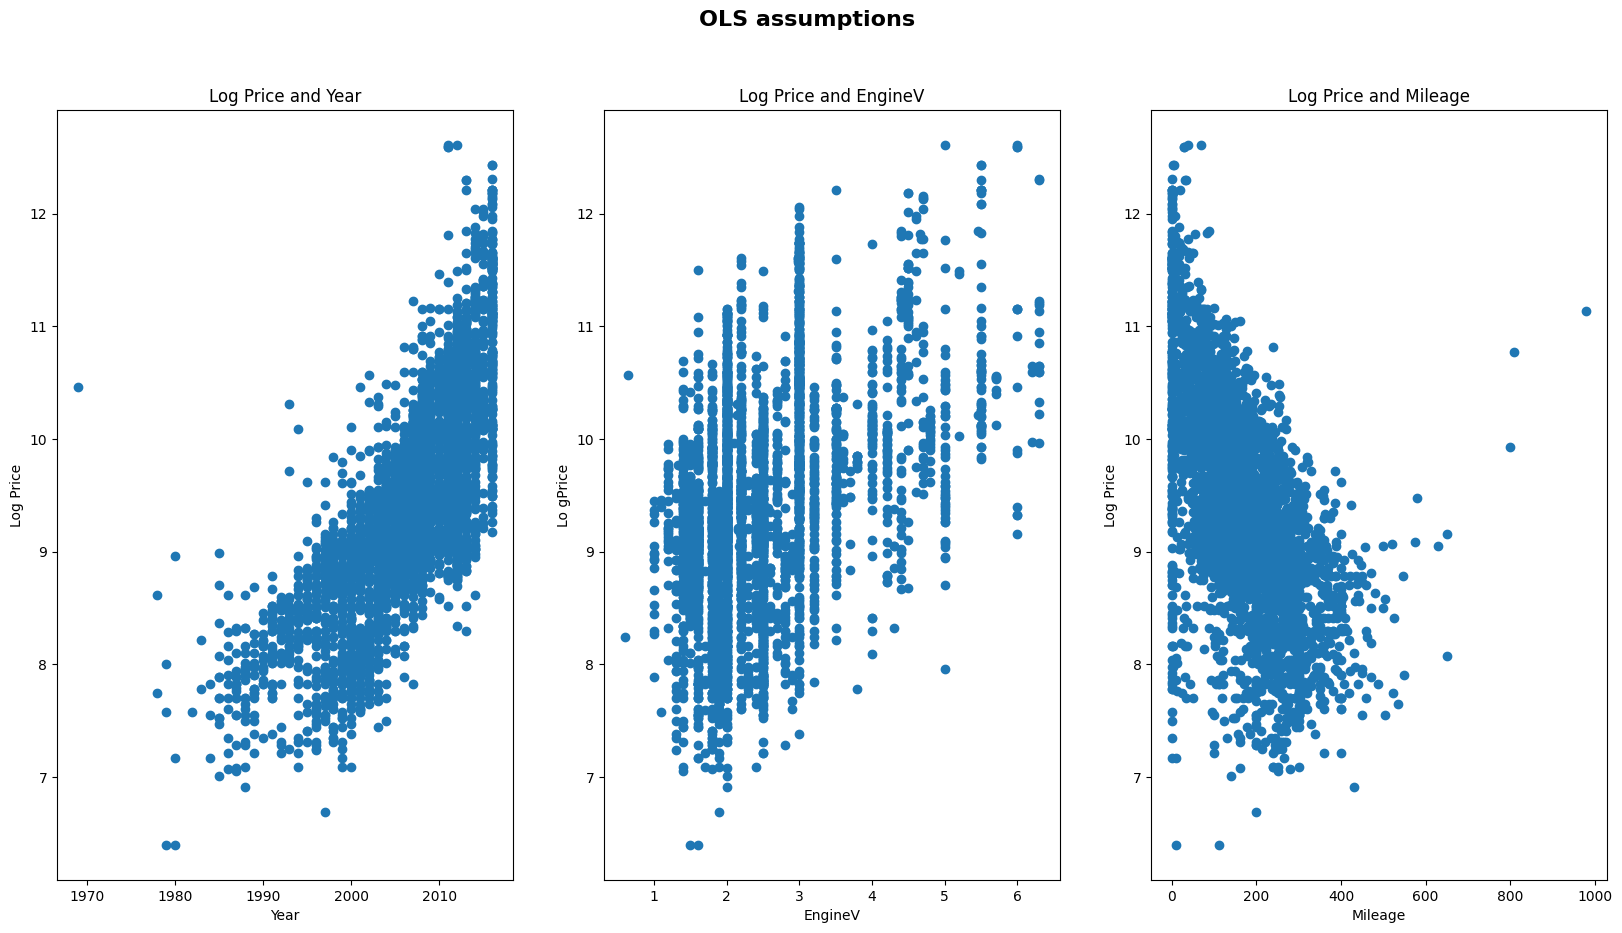

In [436]:
fig, axes = plt.subplots(1, 3, figsize=(20,10))
fig.suptitle('OLS assumptions', fontsize=16, fontweight='bold')

axes[0].scatter(data_cleaned['Year'], data_cleaned['log_price'])
axes[0].set_title('Log Price and Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Log Price')

axes[1].scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
axes[1].set_title('Log Price and EngineV')
axes[1].set_xlabel('EngineV')
axes[1].set_ylabel('Lo gPrice')

axes[2].scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
axes[2].set_title('Log Price and Mileage')
axes[2].set_xlabel('Mileage')
axes[2].set_ylabel('Log Price')

## 5. Check Multicollinearity

In [437]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

*Variance inflation factor:*

In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [439]:
vif

,VIF,features
0,3.47,Mileage
1,10.13,Year
2,7.43,EngineV


In [440]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## 6. Dummy variables

*Create dummy variables*

In [441]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

*Data with dummies*

In [442]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [443]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [444]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.97,427,2.90,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.50,358,5.00,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.04,240,4.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.81,120,2.00,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,9.79,35,1.60,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3998,11.74,9,3.00,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3999,8.78,1,3.50,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4000,8.99,194,2.00,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


## 7. Linear Regression model

*Declare inputs and targets*

In [445]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

*Scale the data*

In [446]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [447]:
inputs_scaled = scaler.transform(inputs)

*Train Test Split*

In [448]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=99)

*Create regression*

In [449]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [450]:
y_hat = reg.predict(x_train)

*Visualize Predictions*

(6.0, 13.0)

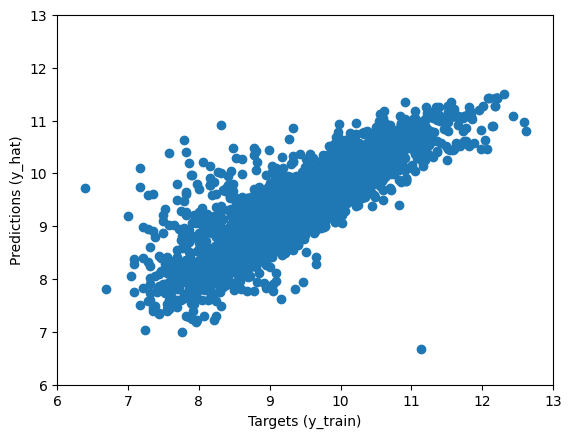

In [451]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.xlim(6,13)
plt.ylim(6,13)

**Residuals PDF**

Text(0.5, 1.0, 'Residuals PDF')

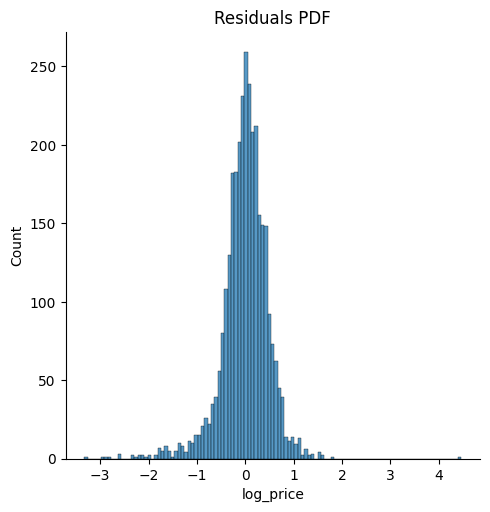

In [452]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF')

*Find weights and bias*

In [453]:
reg.intercept_

9.411529671073716

In [454]:
reg.coef_

array([-0.4665658 ,  0.24635554,  0.01804437,  0.0180591 , -0.13461468,
       -0.17119082, -0.05351704, -0.08380593, -0.15544301, -0.10056437,
       -0.21723211, -0.12615104, -0.16453772, -0.12921449, -0.03194571,
       -0.14184288,  0.30529304])

In [455]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.47
1,EngineV,0.25
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.02
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.17
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.16
9,Body_other,-0.10


## 8. Testing

In [456]:
y_hat_test = reg.predict(x_test)

*Visualize Tests*

(6.0, 13.0)

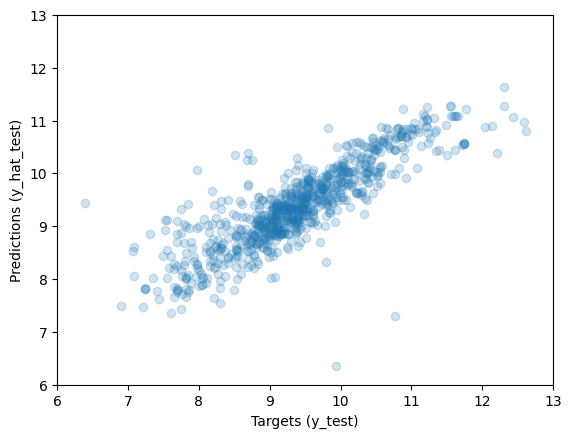

In [457]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)

In [458]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance

,Prediction
0,25980.55
1,13430.35
2,23023.19
3,5801.37
4,36010.26
...,...
796,9101.22
797,8748.39
798,15810.44
799,18783.62


In [459]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,25980.55,NaN
1,13430.35,NaN
2,23023.19,NaN
3,5801.37,NaN
4,36010.26,NaN
...,...,...
796,9101.22,NaN
797,8748.39,NaN
798,15810.44,10999.00
799,18783.62,NaN


In [460]:
y_test = y_test.reset_index(drop=True)
y_test

0     10.02
1      9.53
2     10.09
3      8.80
4     10.87
       ... 
796    9.24
797    8.37
798    8.19
799   10.00
800   10.40
Name: log_price, Length: 801, dtype: float64

In [461]:
df_performance['Target'] = np.exp(y_test)
df_performance

,Prediction,Target
0,25980.55,22500.00
1,13430.35,13700.00
2,23023.19,23999.00
3,5801.37,6650.00
4,36010.26,52500.00
...,...,...
796,9101.22,10299.00
797,8748.39,4300.00
798,15810.44,3600.00
799,18783.62,22000.00


*Calculate Residuals*

In [462]:
df_performance['Residuals'] = df_performance['Target'] - df_performance['Prediction']

*Calculate percentage differences*

In [463]:
df_performance['Difference%'] = np.absolute(df_performance['Residuals'] / df_performance['Target'] * 100)

In [464]:
df_performance

,Prediction,Target,Residuals,Difference%
0,25980.55,22500.00,-3480.55,15.47
1,13430.35,13700.00,269.65,1.97
2,23023.19,23999.00,975.81,4.07
3,5801.37,6650.00,848.63,12.76
4,36010.26,52500.00,16489.74,31.41
...,...,...,...,...
796,9101.22,10299.00,1197.78,11.63
797,8748.39,4300.00,-4448.39,103.45
798,15810.44,3600.00,-12210.44,339.18
799,18783.62,22000.00,3216.38,14.62


In [465]:
df_performance.describe()

,Prediction,Target,Residuals,Difference%
count,801.00,801.00,801.00,801.00
mean,16466.76,20449.56,3982.80,41.82
std,14595.09,29806.39,20676.05,93.51
min,579.04,600.00,-33078.35,0.05
25%,7214.02,6900.00,-2022.57,11.69
50%,11581.29,11500.00,169.80,23.47
75%,19749.21,21900.00,3300.90,42.13
max,112859.53,300000.00,250954.39,2012.04
